<a href="https://colab.research.google.com/github/comojin1994/Deep_Learning_Study/blob/master/Tensorflow/Remind/Remind_image_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 67.4MB/s 
     |████████████████████████████████| 450kB 68.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
from tensorflow.keras import layers, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

2.0.0


In [0]:
# Hyperparameter
num_epochs = 10
batch_size = 32
learning_rate = 0.001
dropout_rate = 0.25
input_shape = (32, 32, 3)
num_classes = 10

loss_ftn = tf.keras.losses.sparse_categorical_crossentropy
metrics = ['accuracy']
optm = tf.keras.optimizers.Adam()

In [0]:
# Model
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, 3, 1, 'SAME', activation='relu')(inputs)
net = layers.Conv2D(32, 3, 1, 'SAME', activation='relu')(net)
net = layers.MaxPool2D(2)(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(64, 3, 1, 'SAME', activation='relu')(net)
net = layers.Conv2D(64, 3, 1, 'SAME', activation='relu')(net)
net = layers.MaxPool2D(2)(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')
model.summary()
model.compile(optimizer=optm, loss=loss_ftn, metrics=metrics)

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36

In [0]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

170500096/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [0]:
train_generator = train_datagen.flow(train_x, train_y, batch_size=batch_size)
test_generator = test_datagen.flow(test_x, test_y, batch_size=batch_size)

In [0]:
len(train_generator), len(test_generator)

(1563, 313)

In [0]:
hist = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Train for 1563 steps, validate for 313 steps
Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.7997 - accuracy: 0.3262 - val_loss: 1.4891 - val_accuracy: 0.4491
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5130 - accuracy: 0.4450 - val_loss: 1.3161 - val_accuracy: 0.5232
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3920 - accuracy: 0.4928 - val_loss: 1.2904 - val_accuracy: 0.5325
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3099 - accuracy: 0.5265 - val_loss: 1.3318 - val_accuracy: 0.5326
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2517 - accuracy: 0.5472 - val_loss: 1.1382 - val_accuracy: 0.5891
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.2131 - accuracy: 0.5619 - val_loss: 1.2933 - val_accuracy: 0.5575
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1

In [0]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

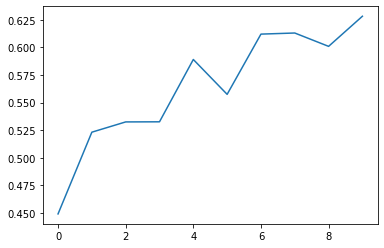

In [0]:
plt.plot(hist.history['val_accuracy'])
plt.show()

In [0]:
pred = model.predict(tf.cast(test_x[0:1], dtype=tf.float32))
pred = tf.argmax(pred, axis=1).numpy()[0]
pred

0

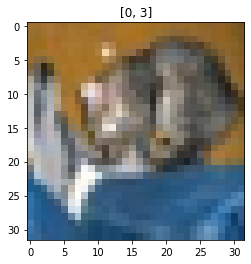

In [0]:
plt.title([pred, test_y[0][0]])
plt.imshow(test_x[0])
plt.show()